In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [11]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
plt.rcParams['figure.figsize'] = (14,4)
import urllib.request

In [3]:
#Loading audio files with librosa

In [14]:
# url = 'http://audio.musicinformationretrieval.com/simple_loop.wav'
# urllib.request.urlretrieve(url, filename='a01.wav')

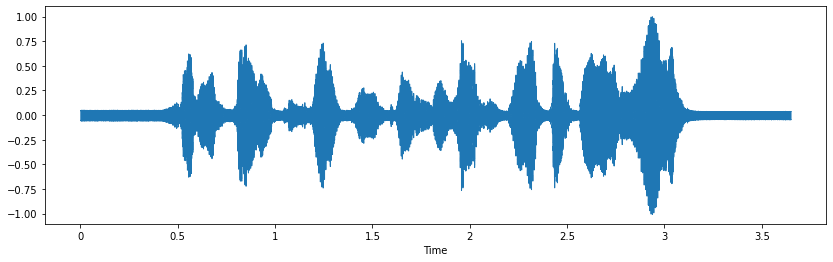

In [15]:
x, fs = librosa.load('a01.wav')
librosa.display.waveshow(x, sr=fs)

In [17]:
ipd.Audio('a01.wav')

In [18]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)

(20, 158)


/tmp/ipykernel_51319/3935653512.py:1: FutureWarning: Pass y=[0.03537439 0.05184603 0.04569934 ... 0.04182833 0.04050382 0.04224475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


In this case, mfcc computed 20 MFCCs over 216 frames.

The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification. For now, we will use the MFCCs as is.

Displaying the MFCCs

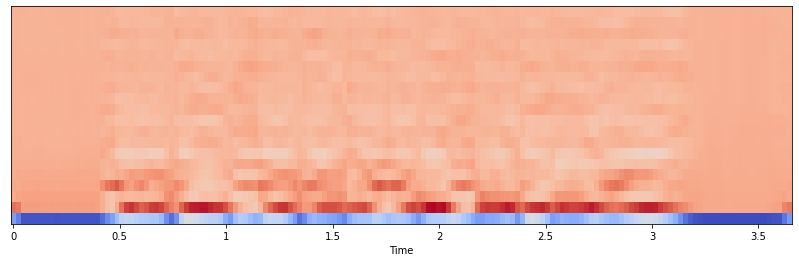

In [19]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [20]:

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-1.5089784e-09  2.4143654e-08 -3.0179568e-09 -6.0359135e-09
  0.0000000e+00  1.2071827e-08  0.0000000e+00 -6.0359135e-09
  0.0000000e+00 -9.0538697e-09 -9.0538697e-09  0.0000000e+00
  0.0000000e+00 -2.4143654e-08 -9.0538697e-09  6.0359135e-09
 -1.5089784e-09  3.0179568e-09 -3.0179568e-09  6.0359135e-09]
[1.        1.        1.        1.        0.9999998 1.        0.9999998
 0.9999998 1.0000002 1.0000001 1.        1.        1.0000001 0.9999999
 0.9999999 1.0000001 1.        1.        0.9999998 1.       ]


/home/prakriti/College/FYP/Project/Emotively/FYP-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/prakriti/College/FYP/Project/Emotively/FYP-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


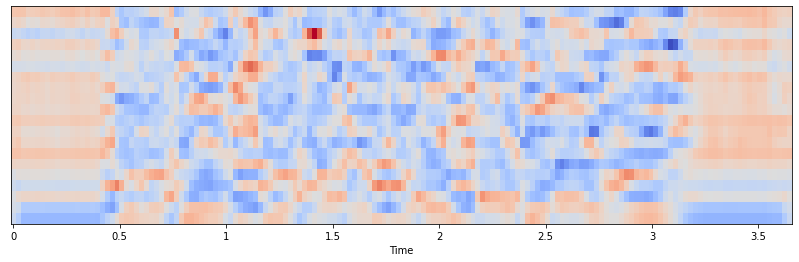

In [21]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [22]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print(mfccs.shape)

(162, 13)


[   INFO   ] TriangularBands: input spectrum size (513) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.


In [23]:
mfccs = sklearn.preprocessing.scale(mfccs)

/home/prakriti/College/FYP/Project/Emotively/FYP-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/prakriti/College/FYP/Project/Emotively/FYP-env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Text(0.5, 0, 'Frame Index')

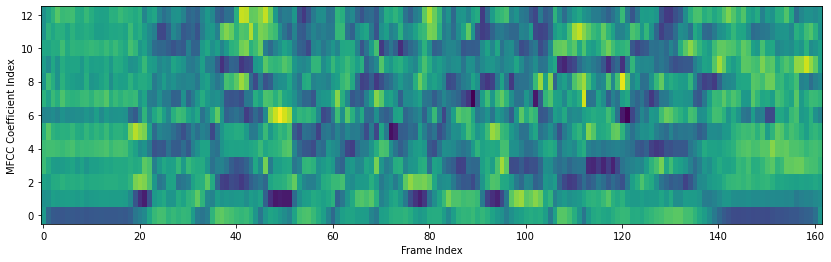

In [24]:
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')

In [26]:
scale,sr = librosa.load('a01.wav')

In [27]:
#MEl Filter Bank 

In [28]:
filter_banks = librosa.filters.mel(n_fft = 2048 , sr = 22050 , n_mels = 10)

In [29]:
filter_banks.shape

(10, 1025)

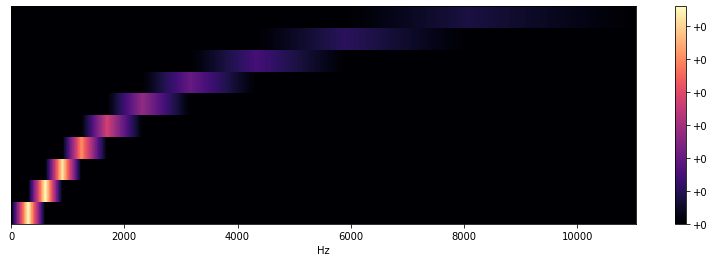

In [30]:
plt.Figure(figsize = (25,10))
librosa.display.specshow(filter_banks, sr=sr , x_axis = "linear")
plt.colorbar(format = "%+2.f")
plt.show()